In [181]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [102]:
fc22 = pd.read_csv('FATOR_CAPACIDADE_2022.csv', sep=';')

In [3]:
fc21 = pd.read_csv('FATOR_CAPACIDADE_2021.csv', sep=';')

In [4]:
fc20 = pd.read_csv('FATOR_CAPACIDADE_2020.csv', sep=';')

In [5]:
fc19 = pd.read_csv('FATOR_CAPACIDADE_2019.csv', sep=';')

In [6]:
fc18 = pd.read_csv('FATOR_CAPACIDADE_2018.csv', sep=';')

In [7]:
fc17 = pd.read_csv('FATOR_CAPACIDADE_2017.csv', sep=';')

In [8]:
fc16 = pd.read_csv('FATOR_CAPACIDADE_2016.csv', sep=';')

In [9]:
fc15 = pd.read_csv('FATOR_CAPACIDADE_2015.csv', sep=';')

In [10]:
fc14 = pd.read_csv('FATOR_CAPACIDADE_2014.csv', sep=';')

In [11]:
fc13 = pd.read_csv('FATOR_CAPACIDADE_2013.csv', sep=';')

In [111]:
fc12 = pd.read_csv('FATOR_CAPACIDADE_2012.csv', sep=';')

Legenda:

- Geração: MWmed
- Capacidade instalada> MW
- Fator de capacidade- obtida pela relação entre a geração e a capacidade instalada

#### Capacidade instalada
#### É um parâmetro que se aplica a todas as usinas de geração de eletricidade e representa a maior quantidade de potência que uma usina pode fornecer. A capacidade instalada é medida em MW (megawatts) normalmente.

In [103]:
fc22.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade
0,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 00:00:00,101.353,426.000,0.237918
1,NE,Nordeste,BA,BAHIA,PINDAI II - 230 kV (A),Interior,-14.353933,-42.575842,Conjunto de Usinas,Eólica,Conj. Abil I,2022-01-01 00:00:00,0.000,71.100,0.000000
2,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,Conjunto de Usinas,Eólica,Conj. Araçás,2022-01-01 00:00:00,62.804,167.700,0.374502
3,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,Conjunto de Usinas,Eólica,Conj. Arizona,2022-01-01 00:00:00,0.000,93.555,0.000000
4,NE,Nordeste,BA,BAHIA,MORRO CHAPEU2 - 230 kV (A),Interior,-10.970000,-41.228000,Conjunto de Usinas,Eólica,Conj. Babilônia,2022-01-01 00:00:00,0.557,136.500,0.004081


In [120]:
fc22.din_instante.value_counts()

2022-06-05 08:00:00    166
2022-06-03 17:00:00    166
2022-06-01 03:00:00    166
2022-06-01 14:00:00    166
2022-06-06 22:00:00    166
                      ... 
2022-01-08 23:00:00    157
2022-02-17 19:00:00    157
2022-02-09 19:00:00    157
2022-01-19 00:00:00    157
2022-01-16 00:00:00    157
Name: din_instante, Length: 3768, dtype: int64

In [16]:
fc22.nom_tipousina.value_counts()

Eólica    493080
Solar     108120
Name: nom_tipousina, dtype: int64

In [105]:
fc22.val_capacidadeinstalada.sum()
#esse valor tá assim pq?

90263995.31381354

In [121]:
fc22['din_instante_date'] =  pd.to_datetime(fc22['din_instante'], format='%Y-%m-%d %H:%M:%S')

In [196]:
fc22['month'] = pd.DatetimeIndex(fc22['din_instante_date']).month

In [197]:
fc22.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade,din_instante_date,month
0,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 00:00:00,101.353,426.000,0.237918,2022-01-01,1
1,NE,Nordeste,BA,BAHIA,PINDAI II - 230 kV (A),Interior,-14.353933,-42.575842,Conjunto de Usinas,Eólica,Conj. Abil I,2022-01-01 00:00:00,0.000,71.100,0.000000,2022-01-01,1
2,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,Conjunto de Usinas,Eólica,Conj. Araçás,2022-01-01 00:00:00,62.804,167.700,0.374502,2022-01-01,1
3,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,Conjunto de Usinas,Eólica,Conj. Arizona,2022-01-01 00:00:00,0.000,93.555,0.000000,2022-01-01,1
4,NE,Nordeste,BA,BAHIA,MORRO CHAPEU2 - 230 kV (A),Interior,-10.970000,-41.228000,Conjunto de Usinas,Eólica,Conj. Babilônia,2022-01-01 00:00:00,0.557,136.500,0.004081,2022-01-01,1


In [ ]:
fc22.groupby(['nom_usina_conjunto', 'din_instante_date']).max()

In [208]:
fc22m = fc22.groupby(['din_instante_date', 'month'])[['val_capacidadeinstalada']].sum()
fc22m

,,val_capacidadeinstalada
din_instante_date,month,
2022-01-01 00:00:00,1,23534.357533
2022-01-01 01:00:00,1,23534.357533
2022-01-01 02:00:00,1,23534.357533
2022-01-01 03:00:00,1,23534.357533
2022-01-01 04:00:00,1,23534.357533
...,...,...
2022-06-06 19:00:00,6,25201.581533
2022-06-06 20:00:00,6,25201.581533
2022-06-06 21:00:00,6,25201.581533


In [223]:
fc22m = fc22m.groupby(['month'])[['val_capacidadeinstalada']].mean()
fc22m

,val_capacidadeinstalada
month,
1,23541.276888
2,23646.611105
3,23836.360759
4,24103.879267
5,24382.647082
6,25201.581533


In [222]:
plt.plot(fc22m.month, fc22m.val_capacidadeinstalada)

AttributeError: 'DataFrame' object has no attribute 'month'

In [ ]:
df['din_instante_date'] = df['din_instante'].apply(lambda x : x[:10])

df['mes'] = df['din_instante'].apply(lambda x : x[5:7])

df_22 = df[['nom_usina_conjunto','mes','val_capacidadeinstalada']]

df_agrupado = df_22.groupby(['nom_usina_conjunto','mes']).max()

df_agrupado.groupby('nom_usina_conjunto').max()['val_capacidadeinstalada'].sum()

df_agrupado.groupby('mes').sum()

In [133]:
avgyear22 = fc22.groupby(['din_instante_date'])['val_capacidadeinstalada'].sum().sum()/len(fc22.groupby(['din_instante_date'])['val_capacidadeinstalada'].sum())

In [134]:
avgyear22

23955.412769058796

In [148]:
avgyear(fc13)

432.0717904979966

In [166]:
avgyear(fc14)

1806.321619919862

In [104]:
fc22.groupby(['din_instante'])['val_capacidadeinstalada'].sum()

din_instante
2022-01-01 00:00:00    23534.357533
2022-01-01 01:00:00    23534.357533
2022-01-01 02:00:00    23534.357533
2022-01-01 03:00:00    23534.357533
2022-01-01 04:00:00    23534.357533
                           ...     
2022-06-06 19:00:00    25201.581533
2022-06-06 20:00:00    25201.581533
2022-06-06 21:00:00    25201.581533
2022-06-06 22:00:00    25201.581533
2022-06-06 23:00:00    25201.581533
Name: val_capacidadeinstalada, Length: 3768, dtype: float64

In [145]:
def avgyear(df):
    return df.groupby(['din_instante'])['val_capacidadeinstalada'].sum().sum()/len(df.groupby(['din_instante'])['val_capacidadeinstalada'].sum())

In [224]:
fc22.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade,din_instante_date,month
0,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 00:00:00,101.353,426.000,0.237918,2022-01-01,1
1,NE,Nordeste,BA,BAHIA,PINDAI II - 230 kV (A),Interior,-14.353933,-42.575842,Conjunto de Usinas,Eólica,Conj. Abil I,2022-01-01 00:00:00,0.000,71.100,0.000000,2022-01-01,1
2,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,Conjunto de Usinas,Eólica,Conj. Araçás,2022-01-01 00:00:00,62.804,167.700,0.374502,2022-01-01,1
3,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,Conjunto de Usinas,Eólica,Conj. Arizona,2022-01-01 00:00:00,0.000,93.555,0.000000,2022-01-01,1
4,NE,Nordeste,BA,BAHIA,MORRO CHAPEU2 - 230 kV (A),Interior,-10.970000,-41.228000,Conjunto de Usinas,Eólica,Conj. Babilônia,2022-01-01 00:00:00,0.557,136.500,0.004081,2022-01-01,1


In [228]:
fc22[fc22['nom_usina_conjunto'] == 'Conj. Paulino Neves']

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade,din_instante_date,month
0,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 00:00:00,101.353,426.0,0.237918,2022-01-01 00:00:00,1
157,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 01:00:00,28.079,426.0,0.065913,2022-01-01 01:00:00,1
314,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 02:00:00,16.569,426.0,0.038894,2022-01-01 02:00:00,1
471,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 03:00:00,18.306,426.0,0.042972,2022-01-01 03:00:00,1
628,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 04:00:00,15.274,426.0,0.035854,2022-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600370,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-06-06 19:00:00,16.283,426.0,0.038223,2022-06-06 19:00:00,6
600536,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-06-06 20:00:00,2.460,426.0,0.005775,2022-06-06 20:00:00,6
600702,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-06-06 21:00:00,0.000,426.0,0.000000,2022-06-06 21:00:00,6
600868,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-06-06 22:00:00,0.000,426.0,0.000000,2022-06-06 22:00:00,6


In [236]:
fc22[['nom_usina_conjunto', 'val_capacidadeinstalada']].drop_duplicates()

,nom_usina_conjunto,val_capacidadeinstalada
0,Conj. Paulino Neves,426.000
1,Conj. Abil I,71.100
2,Conj. Araçás,167.700
3,Conj. Arizona,93.555
4,Conj. Babilônia,136.500
...,...,...
541684,Conj. Morro do Chapéu Sul II-B,126.000
541707,Conj. Serra do Mato,121.800
541708,Conj. Serrote A,205.800
549730,Conj. São Gonçalo A,193.644


In [233]:
fc22[['nom_usina_conjunto', 'val_capacidadeinstalada']].drop_duplicates()['val_capacidadeinstalada'].sum()

27243.88953339

In [235]:
len(fc22['nom_usina_conjunto'].unique())

166

In [174]:
avgcap =[]
years = [fc12, fc13, fc14,fc15, fc16, fc17, fc18, fc19, fc20, fc21, fc22]

for i in years:
    avgcap.append(avgyear(i))
avgcap

[366.7302573152681,
 432.0717904979966,
 1806.321619919862,
 4337.523029192902,
 7165.54882047391,
 10338.665175796325,
 13560.532473113368,
 16010.140251143046,
 17689.46078475183,
 21186.180591837183,
 23955.412769058796]

In [187]:
years2 = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

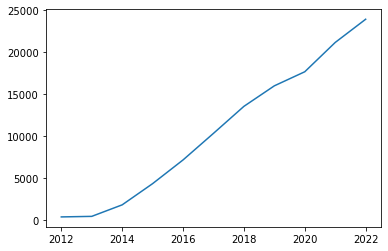

In [188]:
plt.plot(years2, avgcap)

In [140]:
avgyear(fc19)

16010.140251143046

In [126]:
fc22['month'] = fc22['din_instante_date'].dt.month

In [127]:
fc22.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade,din_instante_date,month
0,N,Norte,MA,MARANHAO,MIRANDA II500kVA,Interior,-2.727222,-42.596389,Conjunto de Usinas,Eólica,Conj. Paulino Neves,2022-01-01 00:00:00,101.353,426.000,0.237918,2022-01-01,1
1,NE,Nordeste,BA,BAHIA,PINDAI II - 230 kV (A),Interior,-14.353933,-42.575842,Conjunto de Usinas,Eólica,Conj. Abil I,2022-01-01 00:00:00,0.000,71.100,0.000000,2022-01-01,1
2,NE,Nordeste,BA,BAHIA,IGAPORA II - 230 kV (B),Interior,-14.102794,-42.609369,Conjunto de Usinas,Eólica,Conj. Araçás,2022-01-01 00:00:00,62.804,167.700,0.374502,2022-01-01,1
3,NE,Nordeste,BA,BAHIA,U.SOBRADINHO - 500 kV (A),Interior,-9.751812,-41.006198,Conjunto de Usinas,Eólica,Conj. Arizona,2022-01-01 00:00:00,0.000,93.555,0.000000,2022-01-01,1
4,NE,Nordeste,BA,BAHIA,MORRO CHAPEU2 - 230 kV (A),Interior,-10.970000,-41.228000,Conjunto de Usinas,Eólica,Conj. Babilônia,2022-01-01 00:00:00,0.557,136.500,0.004081,2022-01-01,1


In [106]:
fc22.nom_usina_conjunto.value_counts()

Conj. Lagoa do Barro II           3768
Conj. Olho d'Água                 3768
Conj. Filgueira                   3768
Conj. Taíba                       3768
Malhadinha 1                      3768
                                  ... 
Conj. Serrote A                    360
Conj. Morro do Chapéu Sul II-B     360
Conj. Serra do Mato                360
Conj. Morro do Chapéu Sul II-A     360
Conj. Igaporã II                   144
Name: nom_usina_conjunto, Length: 166, dtype: int64

In [130]:
fc22.groupby('month')['val_capacidadeinstalada'].mean()

month
1    149.944439
2    150.239417
3    149.975073
4    149.837625
5    150.360465
6    151.816756
Name: val_capacidadeinstalada, dtype: float64

In [112]:
fc12.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_pontoconexao,nom_localizacao,val_latitude,val_longitude,nom_modalidadeoperacao,nom_tipousina,nom_usina_conjunto,din_instante,val_geracao,val_capacidadeinstalada,val_fatorcapacidade
0,NE,Nordeste,CE,CEARA,SOBRAL III - 230 kV (A),Litoral,-3.019181,-39.678686,Tipo I,Eólica,Icaraizinho,2012-01-01 00:00:00,31.386,54.60,0.574835
1,NE,Nordeste,CE,CEARA,SOBRAL III - 230 kV (A),Litoral,-2.919422,-41.031650,Tipo I,Eólica,Praia Formosa,2012-01-01 00:00:00,15.648,105.00,0.149029
2,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 230 kV (A),Litoral,-5.115283,-36.384401,Tipo I,Eólica,Alegria I,2012-01-01 00:00:00,13.176,51.00,0.258353
3,NE,Nordeste,RN,RIO GRANDE DO NORTE,ACU II - 230 kV (A),Litoral,-5.097279,-36.402501,Tipo I,Eólica,Alegria II,2012-01-01 00:00:00,0.000,31.35,0.000000
4,S,Sul,RS,RIO GRANDE DO SUL,OSORIO 2 - 69 kV (A),NaN,-30.079059,-50.172056,Tipo II-B,Eólica,Cidreira 1,2012-01-01 00:00:00,58.562,85.50,0.684936


In [113]:
fc12.nom_usina_conjunto.value_counts()

Alegria II       8783
Cidreira 1       8783
Praia Formosa    8783
Alegria I        8783
Icaraizinho      8783
Name: nom_usina_conjunto, dtype: int64

In [115]:
fc12.groupby(['din_instante'])['val_capacidadeinstalada'].sum()

din_instante
2012-01-01 00:00:00    327.45
2012-01-01 01:00:00    327.45
2012-01-01 02:00:00    327.45
2012-01-01 03:00:00    327.45
2012-01-01 04:00:00    327.45
                        ...  
2012-12-31 19:00:00    396.75
2012-12-31 20:00:00    396.75
2012-12-31 21:00:00    396.75
2012-12-31 22:00:00    396.75
2012-12-31 23:00:00    396.75
Name: val_capacidadeinstalada, Length: 8783, dtype: float64

In [116]:
pd.DataFrame(fc12.dtypes, columns=['Type'])

,Type
id_subsistema,object
nom_subsistema,object
id_estado,object
nom_estado,object
nom_pontoconexao,object
nom_localizacao,object
val_latitude,float64
val_longitude,float64
nom_modalidadeoperacao,object
nom_tipousina,object


In [42]:
fc12.shape

(43915, 16)

In [117]:
fc12.nom_tipousina.value_counts()

Eólica    43915
Name: nom_tipousina, dtype: int64

In [118]:
fc12.val_capacidadeinstalada.value_counts()

51.00     8783
54.60     8783
105.00    8783
85.50     8783
67.65     6215
100.65    1608
31.35      624
52.80      312
84.15       24
Name: val_capacidadeinstalada, dtype: int64

In [31]:
fc22.groupby(['nom_subsistema']).sum()

,val_latitude,val_longitude,val_geracao,val_capacidadeinstalada,val_fatorcapacidade
nom_subsistema,,,,,
Nordeste,-4.070364e+06,-2.048096e+07,2.448346e+07,7.683100e+07,159319.136268
Norte,-1.027617e+04,-1.605032e+05,4.429341e+05,1.605168e+06,1039.751352
Sudeste/Centro-Oeste,-5.469010e+05,-1.390848e+06,1.132063e+06,4.529280e+06,6936.205750
Sul,-1.380331e+06,-2.335381e+06,2.319317e+06,7.298550e+06,14503.879942


In [32]:
fc22.groupby(['nom_subsistema','nom_estado'])[['val_geracao']].sum().sort_values(by='val_geracao', ascending=False)

val_geracao
nom_subsistema       nom_estado                       
Nordeste             BAHIA                9.435314e+06
                     RIO GRANDE DO NORTE  6.851797e+06
                     PIAUI                4.299703e+06
Sul                  RIO GRANDE DO SUL    2.112251e+06
Nordeste             CEARA                2.041737e+06
                     PERNAMBUCO           1.227193e+06
                     PARAIBA              6.277192e+05
Sudeste/Centro-Oeste MINAS GERAIS         5.941577e+05
                     SAO PAULO            5.379057e+05
Norte                MARANHAO             4.429341e+05
Sul                  SANTA CATARINA       2.070665e+05

In [33]:
capger = pd.read_csv('CAPACIDADE_GERACAO.csv', sep=';')

Legenda:

- val_potenciaefetiva: Potência Nominal da Unidade Geradora, Conforme Documento Normativo da ANEEL, em MW

In [34]:
capger.head()

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_modalidadeoperacao,nom_agenteproprietario,nom_tipousina,nom_usina,ceg,nom_unidadegeradora,cod_equipamento,num_unidadegeradora,nom_combustivel,dat_entradateste,dat_entradaoperacao,dat_desativacao,val_potenciaefetiva
0,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 1 AL,ALUXG-0UG1,1,HIDRÁULICA,1997-08-22,1997-08-22,NaN,527.0
1,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 2 AL,ALUXG-0UG2,2,HIDRÁULICA,1996-12-20,1996-12-20,NaN,527.0
2,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 3 AL,ALUXG-0UG3,3,HIDRÁULICA,1996-07-31,1996-07-31,NaN,527.0
3,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 4 AL,ALUXG-0UG4,4,HIDRÁULICA,1995-10-26,1995-10-26,NaN,527.0
4,NE,NORDESTE,AL,ALAGOAS,TIPO I,CHESF,HIDROELÉTRICA,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 5 AL,ALUXG-0UG5,5,HIDRÁULICA,1995-01-31,1995-01-31,NaN,527.0


In [35]:
capger.nom_tipousina.value_counts()

EOLIELÉTRICA     1480
TÉRMICA          1355
HIDROELÉTRICA     832
FOTOVOLTAICA      271
BOMBEAMENTO         8
NUCLEAR             2
Name: nom_tipousina, dtype: int64

In [36]:
capger.groupby(['nom_tipousina'])[['val_potenciaefetiva']].sum().sort_values(by='val_potenciaefetiva', ascending=False)

,val_potenciaefetiva
nom_tipousina,
HIDROELÉTRICA,110252.084100
TÉRMICA,34525.649900
EOLIELÉTRICA,20758.565200
FOTOVOLTAICA,4517.294333
NUCLEAR,1990.000000
BOMBEAMENTO,118.500000


In [37]:
ce22 = pd.read_csv('CARGA_ENERGIA_2022.csv', sep=';')

In [38]:
ce22.head()

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,NORTE,2022-01-01,5036.496958
1,NE,NORDESTE,2022-01-01,10017.780333
2,S,SUL,2022-01-01,9892.037917
3,SE,SUDESTE,2022-01-01,31543.827292
4,N,NORTE,2022-01-02,5330.572542
